# Introduction

### Wie wichtig ist die demografische Verteilung in Verbindung mit der Bevölkerungsdichte bei der Ausbreitung des Covid 19 Virus.

### Quasi welche Stadt hat die besten Attribute um einen langsamen Ansteckungsverlauf zuhaben



#### wie wichtig ist die demografische Verteilung bei der Verbreitung des Virus. 
#### gibt es ein Muster zwischen der Ausbreitung innerhalb der Altersgruppen und Geschlechter.
#### ändert die Dunkelziffer was an dem Ergebnis
#### ist der eigentliche Faktor doch nur die Bevölkerungsdichte, jeder weiß dass das der wichtigste Faktor ist aber runtergerechnet auf pro 100000 Einwohner sieht man da Unterschiede bei anderer demografischer Verteilung
#### also breitet sich das Virus unterschiedlich aus bei entsprechenden Altersgruppen


## Zu beachten

Die Zahl der Genesungen ist eher eine Schätzung da je nach Symptomstärke die Erkrankungsdauer auf entweder 14 oder 28 Tage geschätzt wird


Todesfälle sind alle verstorbenen Fälle mit einer nachgewiesenen Coronavirus-Infektion. Die Infektion muss den Tod nicht ursächlich verursacht haben (was meist nicht so einfach feststellbar ist)

In [1]:
from __future__ import division

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [353]:
data5 = pd.read_csv('./data/covid19-data-germany-robert-koch-institute/dd4580c810204019a7b8eb3e0b329dd6_0.csv')
data1 = pd.read_csv('./data/covid19-data-germany-robert-koch-institute/ef4b445a53c1406892257fe63129a8ea_0.csv')
data2 = pd.read_csv('./data/covid19-data-germany-robert-koch-institute/covid19_events_measures.csv')
data3 = pd.read_csv('./data/covid19-data-germany-robert-koch-institute/917fc37a709542548cc3be077a786c17_0.csv')
data4 = pd.read_csv('./data/RKI_COVID19.csv')

data5 = pd.read_csv('./data/statistic_id1351_altersstruktur-der-bevoelkerung-in-deutschland-2018_Daten.csv')
data = pd.read_csv('./data/RKI_COVID19/RKI_COVID19_0.csv')

data6 = pd.read_csv('./data/age_groups_regional.csv', sep=';',encoding='iso-8859-15')

In [371]:
data6 = data6.drop(index=data6.index[:9])
data6 = data6.drop(index=data6.index[-4])

In [390]:
data6.loc[data6.index[-1]]

GENESIS-Tabelle: 12411-04-02-4    NaN
Name: (Stand: 19.04.2020 / 13:03:35, nan, nan, nan, nan), dtype: object

In [377]:
data6

GENESIS-Tabelle: 12411-04-02-4
DG                                                 Deutschland                                    75 bis unter 80 Jahre 4089384  1823611                         2265773
                                                                                                  80 bis unter 85 Jahre 3111597  1287124                         1824473
                                                                                                  85 bis unter 90 Jahre 1482566  530300                           952266
                                                                                                  90 Jahre und mehr     794943   207593                           587350
                                                                                                  Insgesamt             83019213 40966691                       42052522
01                                                   Schleswig-Holstein                           unter 1 Jahr          25260    12928                             12332
                                                                                                  1 bis unter 2 Jahre   25807    13275                             12532
                                                                                                  2 bis unter 3 Jahre   26219    13388                             12831
                                                                                                  3 bis unter 4 Jahre   25546    13125                             12421
                                                                                                  4 bis unter 5 Jahre   25522    12993                             12529
                                                                                                  5 bis unter 6 Jahre   24845    12733                             12112
                                                                                                  6 bis unter 7 Jahre   25287    13029                             12258
                                                                                                  7 bis unter 8 Jahre   24628    12561                             12067
                                                                                                  8 bis unter 9 Jahre   25784    13241                             12543
                                                                                                  9 bis unter 10 Jahre  25362    13162                             12200
                                                                                                  10 bis unter 11 Jahre 26181    13274                             12907
                                                                                                  11 bis unter 12 Jahre 26433    13633                             12800
                                                                                                  12 bis unter 13 Jahre 26025    13411                             12614
                                                                                                  13 bis unter 14 Jahre 26138    13435                             12703
                                                                                                  14 bis unter 15 Jahre 27290    14052                             13238
                                                                                                  15 bis unter 16 Jahre 27533    14111                             13422
                                                                                                  16 bis unter 17 Jahre 28280    14563                             13717
                                                                                                  17 bis unter 18 Jahre 29223    15052                             14171
                                                                                  

In [376]:
data6.tail()

GENESIS-Tabelle: 12411-04-02-4
16077                                                    Altenburger Land, Kreis 80 bis unter 85 Jahre 4591  1879                            2712
                                                                                 85 bis unter 90 Jahre 2279  761                             1518
                                                                                 Insgesamt             90118 44138                          45980
zu "gesamter Tabelle":\nab dem Berichtsjahr 201... NaN                           NaN                   NaN   NaN                              NaN
Stand: 19.04.2020 / 13:03:35                       NaN                           NaN                   NaN   NaN                              NaN

In [364]:
data6.index[-0]

('DG', 'Deutschland', '38 bis unter 39 Jahre', '1060769', '535440')

### transform csv into dict

In [279]:
regional_demographics_dict = {'region_key':[],'region':[],'age_group':[],'total':[],'male':[]}

In [280]:
def toDict(indicies):
    for index in indicies.index.values:
        regional_demographics_dict['region_key'].append(index[0])
        regional_demographics_dict['region'].append(index[1])
        regional_demographics_dict['age_group'].append(index[2])
        regional_demographics_dict['total'].append(index[3])
        regional_demographics_dict['male'].append(index[4])

In [284]:
toDict(data6)


In [285]:
for k in regional_demographics_dict.keys():
    print(len(regional_demographics_dict[k]))

86080
86080
86080
86080
86080


In [239]:
pd.DataFrame(regional_demographics_dict)

ValueError: arrays must all be same length

In [226]:
data4

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen
0,1,Schleswig-Holstein,LK Pinneberg,A35-A59,W,1,0,2313946,2020-04-01T00:00:00.000Z,1056,"15.04.2020, 00:00 Uhr",0,-9,2020-03-28T00:00:00.000Z,0,1
1,1,Schleswig-Holstein,LK Pinneberg,A35-A59,W,1,0,2313947,2020-04-01T00:00:00.000Z,1056,"15.04.2020, 00:00 Uhr",0,-9,2020-03-29T00:00:00.000Z,0,1
2,1,Schleswig-Holstein,LK Pinneberg,A35-A59,W,2,0,2313948,2020-04-01T00:00:00.000Z,1056,"15.04.2020, 00:00 Uhr",0,-9,2020-04-01T00:00:00.000Z,-9,0
3,1,Schleswig-Holstein,LK Pinneberg,A35-A59,W,2,0,2313949,2020-04-01T00:00:00.000Z,1056,"15.04.2020, 00:00 Uhr",0,-9,2020-04-01T00:00:00.000Z,1,2
4,1,Schleswig-Holstein,LK Pinneberg,A35-A59,W,1,0,2313950,2020-04-02T00:00:00.000Z,1056,"15.04.2020, 00:00 Uhr",0,-9,2020-03-21T00:00:00.000Z,-9,0
5,1,Schleswig-Holstein,LK Pinneberg,A35-A59,W,1,0,2313951,2020-04-02T00:00:00.000Z,1056,"15.04.2020, 00:00 Uhr",0,-9,2020-03-27T00:00:00.000Z,-9,0
6,1,Schleswig-Holstein,LK Pinneberg,A35-A59,W,1,0,2313952,2020-04-03T00:00:00.000Z,1056,"15.04.2020, 00:00 Uhr",0,-9,2020-03-28T00:00:00.000Z,0,1
7,1,Schleswig-Holstein,LK Pinneberg,A35-A59,W,1,0,2313953,2020-04-03T00:00:00.000Z,1056,"15.04.2020, 00:00 Uhr",0,-9,2020-03-30T00:00:00.000Z,-9,0
8,1,Schleswig-Holstein,LK Pinneberg,A35-A59,W,1,0,2313954,2020-04-03T00:00:00.000Z,1056,"15.04.2020, 00:00 Uhr",0,-9,2020-03-31T00:00:00.000Z,0,1
9,1,Schleswig-Holstein,LK Pinneberg,A35-A59,W,3,0,2313955,2020-04-03T00:00:00.000Z,1056,"15.04.2020, 00:00 Uhr",0,-9,2020-04-03T00:00:00.000Z,-9,0


In [5]:
data

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,Landkreis ID,Datenstand,Neuer Fall,Neuer Todesfall,Referenzdatum,Neu Genesen,Anzahl Genesen
0,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2312946,3/14/2020 12:00:00 AM,1001,"15.04.2020, 00:00 Uhr",0,-9,3/16/2020 12:00:00 AM,0,1
1,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2312947,3/19/2020 12:00:00 AM,1001,"15.04.2020, 00:00 Uhr",0,-9,3/13/2020 12:00:00 AM,0,1
2,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2312948,3/19/2020 12:00:00 AM,1001,"15.04.2020, 00:00 Uhr",0,-9,3/16/2020 12:00:00 AM,0,1
3,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2312949,3/21/2020 12:00:00 AM,1001,"15.04.2020, 00:00 Uhr",0,-9,3/13/2020 12:00:00 AM,0,1
4,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2312950,3/27/2020 12:00:00 AM,1001,"15.04.2020, 00:00 Uhr",0,-9,3/22/2020 12:00:00 AM,0,1
5,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2312951,4/4/2020 12:00:00 AM,1001,"15.04.2020, 00:00 Uhr",0,-9,4/1/2020 12:00:00 AM,1,1
6,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2312952,4/6/2020 12:00:00 AM,1001,"15.04.2020, 00:00 Uhr",0,-9,4/2/2020 12:00:00 AM,-9,0
7,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2312953,4/7/2020 12:00:00 AM,1001,"15.04.2020, 00:00 Uhr",0,-9,4/2/2020 12:00:00 AM,-9,0
8,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2312954,4/9/2020 12:00:00 AM,1001,"15.04.2020, 00:00 Uhr",0,-9,4/5/2020 12:00:00 AM,-9,0
9,1,Schleswig-Holstein,SK Flensburg,A15-A34,W,1,0,2312955,3/14/2020 12:00:00 AM,1001,"15.04.2020, 00:00 Uhr",0,-9,3/12/2020 12:00:00 AM,0,1


In [6]:
data5.shape

(92, 13)

In [7]:
data.shape

(95455, 16)

In [8]:
data.dtypes

IdBundesland        int64
Bundesland         object
Landkreis          object
Altersgruppe       object
Geschlecht         object
AnzahlFall          int64
AnzahlTodesfall     int64
ObjectId            int64
Meldedatum         object
Landkreis ID        int64
Datenstand         object
Neuer Fall          int64
Neuer Todesfall     int64
Referenzdatum      object
Neu Genesen         int64
Anzahl Genesen      int64
dtype: object

In [9]:
data.count()

IdBundesland       95455
Bundesland         95455
Landkreis          95455
Altersgruppe       95455
Geschlecht         95455
AnzahlFall         95455
AnzahlTodesfall    95455
ObjectId           95455
Meldedatum         95455
Landkreis ID       95455
Datenstand         95455
Neuer Fall         95455
Neuer Todesfall    95455
Referenzdatum      95455
Neu Genesen        95455
Anzahl Genesen     95455
dtype: int64

### check for None values

In [10]:
for column in data.columns:
    print(column,"None values:",data[column].isnull().sum())

IdBundesland None values: 0
Bundesland None values: 0
Landkreis None values: 0
Altersgruppe None values: 0
Geschlecht None values: 0
AnzahlFall None values: 0
AnzahlTodesfall None values: 0
ObjectId None values: 0
Meldedatum None values: 0
Landkreis ID None values: 0
Datenstand None values: 0
Neuer Fall None values: 0
Neuer Todesfall None values: 0
Referenzdatum None values: 0
Neu Genesen None values: 0
Anzahl Genesen None values: 0


### Drop unknown agegroups

In [11]:
data.loc[data['Altersgruppe'] == 'unbekannt']

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,Landkreis ID,Datenstand,Neuer Fall,Neuer Todesfall,Referenzdatum,Neu Genesen,Anzahl Genesen
643,1,Schleswig-Holstein,LK Herzogtum Lauenburg,unbekannt,M,1,0,2313589,3/17/2020 12:00:00 AM,1053,"15.04.2020, 00:00 Uhr",0,-9,3/11/2020 12:00:00 AM,0,1
644,1,Schleswig-Holstein,LK Herzogtum Lauenburg,unbekannt,W,1,0,2313590,3/17/2020 12:00:00 AM,1053,"15.04.2020, 00:00 Uhr",0,-9,3/17/2020 12:00:00 AM,0,1
1151,1,Schleswig-Holstein,LK Pinneberg,unbekannt,M,1,0,2314097,3/21/2020 12:00:00 AM,1056,"15.04.2020, 00:00 Uhr",0,-9,3/21/2020 12:00:00 AM,-9,0
1152,1,Schleswig-Holstein,LK Pinneberg,unbekannt,M,1,0,2314098,3/24/2020 12:00:00 AM,1056,"15.04.2020, 00:00 Uhr",0,-9,3/24/2020 12:00:00 AM,-9,0
1153,1,Schleswig-Holstein,LK Pinneberg,unbekannt,M,1,0,2314099,4/4/2020 12:00:00 AM,1056,"15.04.2020, 00:00 Uhr",0,-9,4/3/2020 12:00:00 AM,-9,0
1154,1,Schleswig-Holstein,LK Pinneberg,unbekannt,W,1,0,2314100,3/27/2020 12:00:00 AM,1056,"15.04.2020, 00:00 Uhr",0,-9,3/27/2020 12:00:00 AM,-9,0
1155,1,Schleswig-Holstein,LK Pinneberg,unbekannt,W,1,0,2314101,3/31/2020 12:00:00 AM,1056,"15.04.2020, 00:00 Uhr",0,-9,3/31/2020 12:00:00 AM,-9,0
1156,1,Schleswig-Holstein,LK Pinneberg,unbekannt,W,1,0,2314102,4/3/2020 12:00:00 AM,1056,"15.04.2020, 00:00 Uhr",0,-9,4/3/2020 12:00:00 AM,-9,0
1157,1,Schleswig-Holstein,LK Pinneberg,unbekannt,W,1,0,2314103,4/8/2020 12:00:00 AM,1056,"15.04.2020, 00:00 Uhr",0,-9,4/8/2020 12:00:00 AM,-9,0
1729,1,Schleswig-Holstein,LK Segeberg,unbekannt,W,1,0,2314675,4/14/2020 12:00:00 AM,1060,"15.04.2020, 00:00 Uhr",1,-9,4/4/2020 12:00:00 AM,-9,0


In [12]:
data = data.drop(labels = data.loc[data['Altersgruppe'] == 'unbekannt'].index)

## count for age groups

In [13]:
print('Infected')
print(data.loc[data['AnzahlFall'] > 0].groupby('Altersgruppe')['AnzahlFall'].sum())
print()
print('Dead')
print(data.loc[data['AnzahlFall'] > 0].groupby('Altersgruppe')['AnzahlTodesfall'].sum())
print()
print('Genesen')
print(data.loc[data['AnzahlFall'] > 0].groupby('Altersgruppe')['Anzahl Genesen'].sum())


Infected
Altersgruppe
A00-A04     1011
A05-A14     2501
A15-A34    30936
A35-A59    55612
A60-A79    24669
A80+       12625
Name: AnzahlFall, dtype: int64

Dead
Altersgruppe
A00-A04       1
A05-A14       0
A15-A34       5
A35-A59     144
A60-A79    1051
A80+       2050
Name: AnzahlTodesfall, dtype: int64

Genesen
Altersgruppe
A00-A04      542
A05-A14     1520
A15-A34    19499
A35-A59    35599
A60-A79    12515
A80+        2748
Name: Anzahl Genesen, dtype: int64


## count for gender

In [14]:
print('Infected')
print(data.loc[data['AnzahlFall'] > 0].groupby('Geschlecht')['AnzahlFall'].sum())
print()
print('Dead')
print(data.loc[data['AnzahlFall'] > 0].groupby('Geschlecht')['AnzahlTodesfall'].sum())
print()
print('Genesen')
print(data.loc[data['AnzahlFall'] > 0].groupby('Geschlecht')['Anzahl Genesen'].sum())


Infected
Geschlecht
M            61189
W            65748
unbekannt      417
Name: AnzahlFall, dtype: int64

Dead
Geschlecht
M            1906
W            1342
unbekannt       3
Name: AnzahlTodesfall, dtype: int64

Genesen
Geschlecht
M            35982
W            36324
unbekannt      117
Name: Anzahl Genesen, dtype: int64


## count for Landkreise

In [15]:
print('Infected')
print(data.loc[data['AnzahlFall'] > 0].groupby('Landkreis')['AnzahlFall'].sum())
print()
print('Dead')
print(data.loc[data['AnzahlFall'] > 0].groupby('Landkreis')['AnzahlTodesfall'].sum())
print()
print('Genesen')
print(data.loc[data['AnzahlFall'] > 0].groupby('Landkreis')['Anzahl Genesen'].sum())


Infected
Landkreis
LK Ahrweiler                             111
LK Aichach-Friedberg                     241
LK Alb-Donau-Kreis                       432
LK Altenburger Land                       36
LK Altenkirchen                           94
LK Altmarkkreis Salzwedel                 28
LK Altötting                             423
LK Alzey-Worms                           140
LK Amberg-Sulzbach                       334
LK Ammerland                             137
LK Anhalt-Bitterfeld                      51
LK Ansbach                               360
LK Aschaffenburg                         373
LK Augsburg                              324
LK Aurich                                 70
LK Bad Dürkheim                          274
LK Bad Kissingen                         188
LK Bad Kreuznach                         145
LK Bad Tölz-Wolfratshausen               345
LK Bamberg                               346
LK Barnim                                231
LK Bautzen                          

## count for Bundesland

In [16]:
print('Infected')
print(data.loc[data['AnzahlFall'] > 0].groupby('Bundesland')['AnzahlFall'].sum())
print()
print('Dead')
print(data.loc[data['AnzahlFall'] > 0].groupby('Bundesland')['AnzahlTodesfall'].sum())
print()
print('Genesen')
print(data.loc[data['AnzahlFall'] > 0].groupby('Bundesland')['Anzahl Genesen'].sum())


Infected
Bundesland
Baden-Württemberg         25375
Bayern                    34275
Berlin                     4710
Brandenburg                1950
Bremen                      498
Hamburg                    3858
Hessen                     6333
Mecklenburg-Vorpommern      624
Niedersachsen              8013
Nordrhein-Westfalen       25790
Rheinland-Pfalz            4958
Saarland                   2144
Sachsen                    3819
Sachsen-Anhalt             1222
Schleswig-Holstein         2235
Thüringen                  1550
Name: AnzahlFall, dtype: int64

Dead
Bundesland
Baden-Württemberg         767
Bayern                    953
Berlin                     62
Brandenburg                42
Bremen                     21
Hamburg                    67
Hessen                    173
Mecklenburg-Vorpommern     11
Niedersachsen             224
Nordrhein-Westfalen       605
Rheinland-Pfalz            77
Saarland                   58
Sachsen                    73
Sachsen-Anhalt             26


## total count

In [17]:
print('infected: ',data.loc[data['AnzahlFall'] > 0]['AnzahlFall'].sum())
print('dead: ',data.loc[data['AnzahlFall'] > 0]['AnzahlTodesfall'].sum())
print('genesen: ',data.loc[data['AnzahlFall'] > 0]['Anzahl Genesen'].sum())

infected:  127354
dead:  3251
genesen:  72423


In [18]:
def formateToDateObject(date):
    return pd.to_datetime(date).date()


In [19]:
data['formated_ref_date'] = data['Referenzdatum'].apply(lambda date: formateToDateObject(date))

In [20]:
germany_data = data.loc[data["AnzahlFall"] > 0].sort_values(by=['formated_ref_date']).groupby(['formated_ref_date','Altersgruppe'])['AnzahlFall'].sum()

In [21]:
def createDfForLineGraph(data):
    dictData = {'Referenzdatum':[],'Altersgruppe':[],'AnzahlFall':[]}
    
    for i,x in enumerate(data):
        dictData['Referenzdatum'].append(data.index[i][0])
        dictData['Altersgruppe'].append(data.index[i][1])
        dictData['AnzahlFall'].append(x)
        dictDataDf = pd.DataFrame(dictData)
    return dictDataDf


In [22]:
germany_data_df = createDfForLineGraph(germany_data)

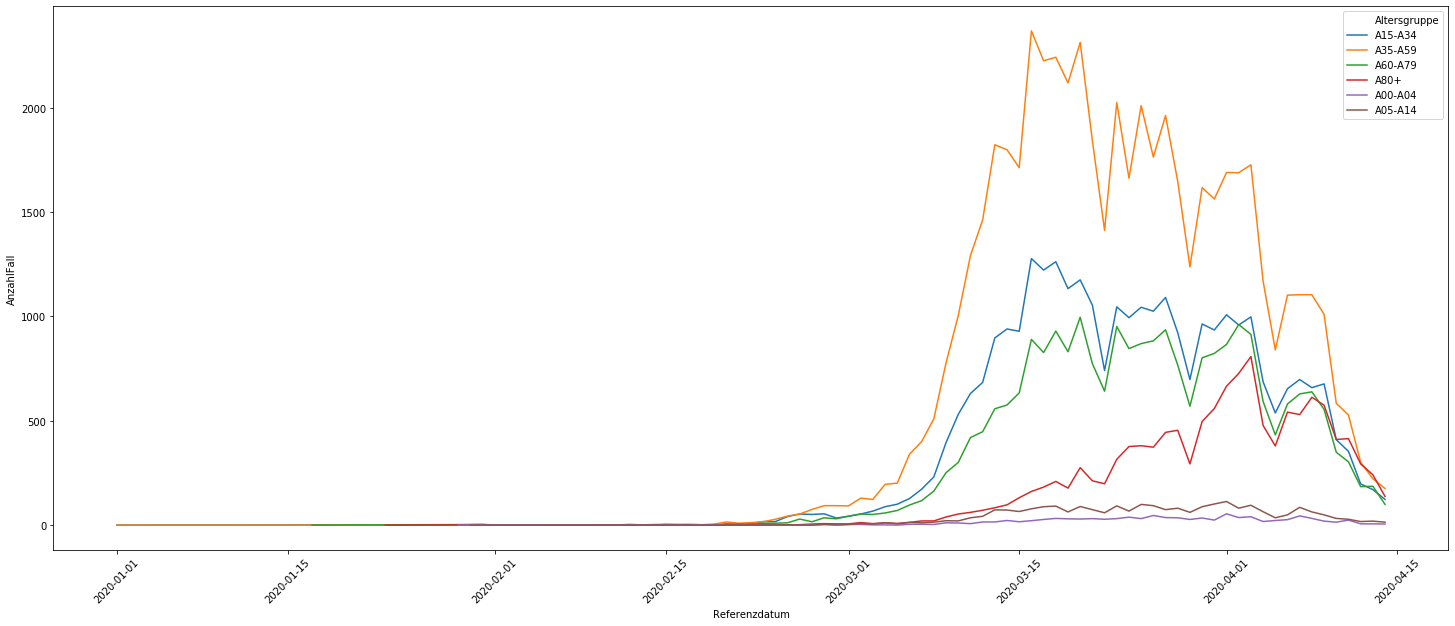

In [23]:
fig, ax = plt.subplots(figsize=(25,10))
plt.xticks(rotation=45)


sns.lineplot(ax=ax, x='Referenzdatum', y='AnzahlFall', hue='Altersgruppe', 
             data=germany_data_df,sort=False)


Was sagt dieser Graph aus. Wie die Verteilung des Virus ist allerdings kann die Verteilung deshalb so unterschiedlich sein weil es zum Beispiel mehr alte Leute gibt.

also die nächste Aufgabe ist finde die gesamt Einwohnerzahl von der demographischen Verteilung

In [24]:
age_distribution_data = pd.DataFrame(data=data5[['Unnamed: 1','Unnamed: 2']][4:-2].values, columns=['Age','Count'])

Formatting

In [25]:
def formateAge(age):
    formatted_age = age.replace("-Jährige","")
    if len(formatted_age)>2:
        #formatted_age = [s for s in formatted_age.str.split() if s.str.isdigit()]
        formatted_age =  [int(s) for s in formatted_age.split() if s.isdigit()][0]
    return int(formatted_age)

In [26]:
age_distribution_data['Age'] = age_distribution_data['Age'].apply(lambda age: formateAge(age))

In [27]:
def formateCount(count): 
    count = count.replace(',','')
    count = int(count)
    return count 

In [28]:
age_distribution_data['Count'] = age_distribution_data['Count'].apply(lambda count: formateCount(count))

In [29]:
age_distribution_data

,Age,Count
0,1,783978
1,1,796374
2,2,802651
3,3,776763
4,4,766631
5,5,739729
6,6,736749
7,7,720613
8,8,738238
9,9,726909


In [30]:

newdict = {}

for age_group in data['Altersgruppe'].value_counts().index:
    age_range = re.findall(r'\d+',age_group)
    newdict[age_group] = 0
    
    if len(age_range) == 2:
        for i in range(int(age_range[0]),int(age_range[1])+1):
                try:
                    newdict[age_group] = newdict[age_group] + age_distribution_data.loc[age_distribution_data['Age'] == i]['Count'].sum()
                except:
                    continue
    else:
        for i in range(int(age_range[0]),int(age_distribution_data['Age'].max()+1)):
            newdict[age_group] = newdict[age_group] + age_distribution_data.loc[age_distribution_data['Age'] == i]['Count'].sum()
    


In [31]:
newdict

{'A35-A59': 29137839,
 'A15-A34': 19213113,
 'A60-A79': 17988340,
 'A80+': 5389106,
 'A05-A14': 7364418,
 'A00-A04': 3926397}

also vorher hab ich in einem lineplot die infizierten zahlen von den altersgruppen gezeigt. Was aber eigentlich interessant ist ist der anteil der infizierten in prozent im verhältnis zu den  

warum ist das wichtig dass in Prozent zuzeigen?
wenn man nur die anzahl zwischen den Altersgruppen zeigt kann man die nicht so gut vergleichen das es vlt mehr alte als junge gibt 

In [33]:
percent_dictDataDf = germany_data_df.copy()

In [34]:
for age_group in list(newdict.keys()):
    percent_dictDataDf_age_group = percent_dictDataDf.loc[percent_dictDataDf['Altersgruppe'] == age_group]['AnzahlFall']
    percent_dictDataDf.loc[percent_dictDataDf['Altersgruppe'] == age_group,'AnzahlFall'] = percent_dictDataDf_age_group / newdict[age_group]* 100


In [35]:
#percent_dictDataDf['AnzahlFall'] = percent_dictDataDf['AnzahlFall'].apply(lambda count: "{:.8f}".format(count))

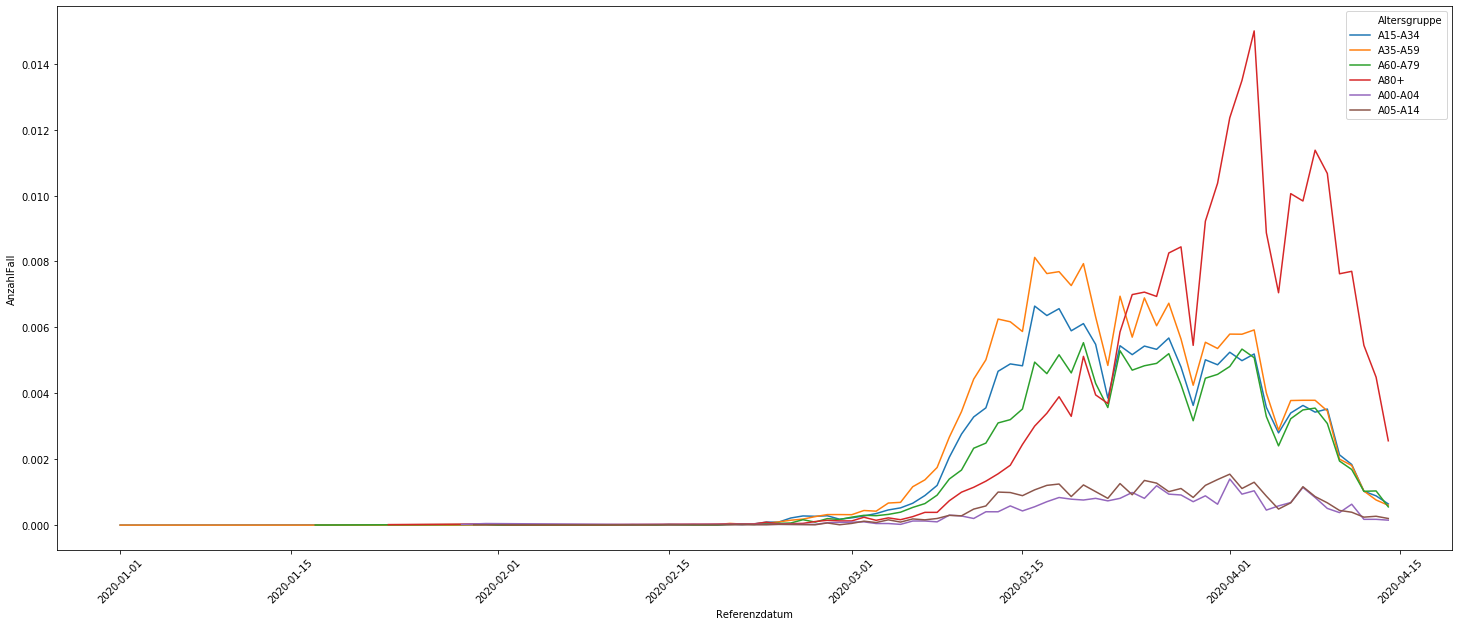

In [36]:
fig, ax = plt.subplots(figsize=(25,10))
plt.xticks(rotation=45)
sns.lineplot(ax=ax, x='Referenzdatum', y='AnzahlFall', hue='Altersgruppe', 
             data=percent_dictDataDf,sort=False)


### Calculating dark numbers


#### calculate mortality rate for each age group

bräuchte die daten von leuten die aufeinmal gestorben sind damit man das in Relation setzten kann mit den Toden von Leuten wo man von beginn wusste dass sie infiziert sind um rückschlüße auf die Dunkelziffer ziehen zu können. Man weiß ja den anteil von den getrackten Leuten die überlebt haben dann kann man sich auch denken wieviele überlebt haben von den ungetrackten anhand von den spontanen toden

### Landkreise vergleichen

Wonach suche ich
hat ein Landeskreis eine andere Kurve als andere.
Wenn ja warum hat er andere Demografie

Wie vergleiche ich die Kurve?
Alle Kurven müssen starten sobald das erste mal ein infizierter aufgetaucht ist.



Schreib eine Funktion die die infizierten eines Landes rausfiltert.
Die Challenge wird es die x start wert gleichzuhaben überall

In [37]:
landkreise = data["Landkreis"].value_counts().index

In [38]:
df_landkreise_dict = {}

In [40]:
for landkreis in landkreise:
    df_landkreise_dict[landkreis] = data.loc[(data["Landkreis"]==landkreis)&(data["AnzahlFall"] > 0)].sort_values(by=['formated_ref_date']).groupby(['formated_ref_date','Altersgruppe'])['AnzahlFall'].sum()
    df_landkreise_dict[landkreis] = createDfForLineGraph(df_landkreise_dict[landkreis])

In [45]:
data.loc[data['Landkreis'].str.contains('Herzogtum Lauenburg')]

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,Landkreis ID,Datenstand,Neuer Fall,Neuer Todesfall,Referenzdatum,Neu Genesen,Anzahl Genesen,formated_ref_date
458,1,Schleswig-Holstein,LK Herzogtum Lauenburg,A00-A04,M,1,0,2313404,3/21/2020 12:00:00 AM,1053,"15.04.2020, 00:00 Uhr",0,-9,3/15/2020 12:00:00 AM,0,1,2020-03-15
459,1,Schleswig-Holstein,LK Herzogtum Lauenburg,A00-A04,M,1,0,2313405,3/21/2020 12:00:00 AM,1053,"15.04.2020, 00:00 Uhr",0,-9,3/17/2020 12:00:00 AM,0,1,2020-03-17
460,1,Schleswig-Holstein,LK Herzogtum Lauenburg,A00-A04,M,1,0,2313406,3/24/2020 12:00:00 AM,1053,"15.04.2020, 00:00 Uhr",0,-9,3/20/2020 12:00:00 AM,-9,0,2020-03-20
461,1,Schleswig-Holstein,LK Herzogtum Lauenburg,A00-A04,W,1,0,2313407,4/13/2020 12:00:00 AM,1053,"15.04.2020, 00:00 Uhr",0,-9,4/6/2020 12:00:00 AM,-9,0,2020-04-06
462,1,Schleswig-Holstein,LK Herzogtum Lauenburg,A05-A14,M,1,0,2313408,3/23/2020 12:00:00 AM,1053,"15.04.2020, 00:00 Uhr",0,-9,3/16/2020 12:00:00 AM,0,1,2020-03-16
463,1,Schleswig-Holstein,LK Herzogtum Lauenburg,A05-A14,W,1,0,2313409,4/6/2020 12:00:00 AM,1053,"15.04.2020, 00:00 Uhr",0,-9,4/3/2020 12:00:00 AM,-9,0,2020-04-03
464,1,Schleswig-Holstein,LK Herzogtum Lauenburg,A05-A14,W,1,0,2313410,4/11/2020 12:00:00 AM,1053,"15.04.2020, 00:00 Uhr",0,-9,3/15/2020 12:00:00 AM,1,1,2020-03-15
465,1,Schleswig-Holstein,LK Herzogtum Lauenburg,A15-A34,M,1,0,2313411,3/11/2020 12:00:00 AM,1053,"15.04.2020, 00:00 Uhr",0,-9,3/5/2020 12:00:00 AM,0,1,2020-03-05
466,1,Schleswig-Holstein,LK Herzogtum Lauenburg,A15-A34,M,1,0,2313412,3/18/2020 12:00:00 AM,1053,"15.04.2020, 00:00 Uhr",0,-9,3/14/2020 12:00:00 AM,0,1,2020-03-14
467,1,Schleswig-Holstein,LK Herzogtum Lauenburg,A15-A34,M,1,0,2313413,3/21/2020 12:00:00 AM,1053,"15.04.2020, 00:00 Uhr",0,-9,3/17/2020 12:00:00 AM,0,1,2020-03-17
